In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq
%matplotlib inline

In [19]:
signal_frequency = 5
length_seconds = 100
noise_amplitude = 0.001
time_100hz = np.linspace(0, length_seconds, length_seconds * 100 + 1)
time_400hz = np.linspace(0, length_seconds, length_seconds * 400 + 1)
time_800hz = np.linspace(0, length_seconds, length_seconds * 800 + 1)
time_1600hz = np.linspace(0, length_seconds, length_seconds * 1600 + 1)
signal_sample_100hz = np.sin(2 * np.pi * time_100hz * signal_frequency) + np.random.random(size=time_100hz.size) * noise_amplitude
signal_sample_400hz = np.sin(2 * np.pi * time_400hz * signal_frequency) + np.random.random(size=time_400hz.size) * noise_amplitude
signal_sample_800hz = np.sin(2 * np.pi * time_800hz * signal_frequency) + np.random.random(size=time_800hz.size) * noise_amplitude
signal_sample_1600hz = np.sin(2 * np.pi * time_1600hz * signal_frequency) + np.random.random(size=time_1600hz.size) * noise_amplitude

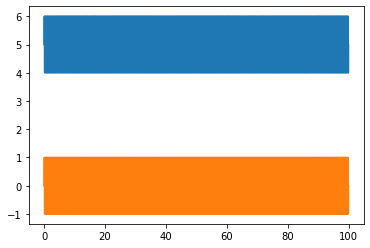

In [25]:
plt.plot(time_800hz, signal_sample_800hz + 5)
plt.plot(time_1600hz, signal_sample_1600hz)

In [10]:
def calc_fft(sample_rate, signal):
    # Compute the FFT freq. bins
    frq = rfftfreq(signal.size, d=1./sample_rate)

    # Compute FFT and normalize is two ways
    X = rfft(signal)
    X_len_norm = X/(0.5*signal.size)
    return frq, X_len_norm

In [26]:
fft_x_100, fft_y_100 = calc_fft(100, signal_sample_100hz)
fft_x_400, fft_y_400 = calc_fft(400, signal_sample_400hz)
fft_x_800, fft_y_800 = calc_fft(800, signal_sample_800hz)
fft_x_1600, fft_y_1600 = calc_fft(1600, signal_sample_1600hz)

(1e-06, 2)

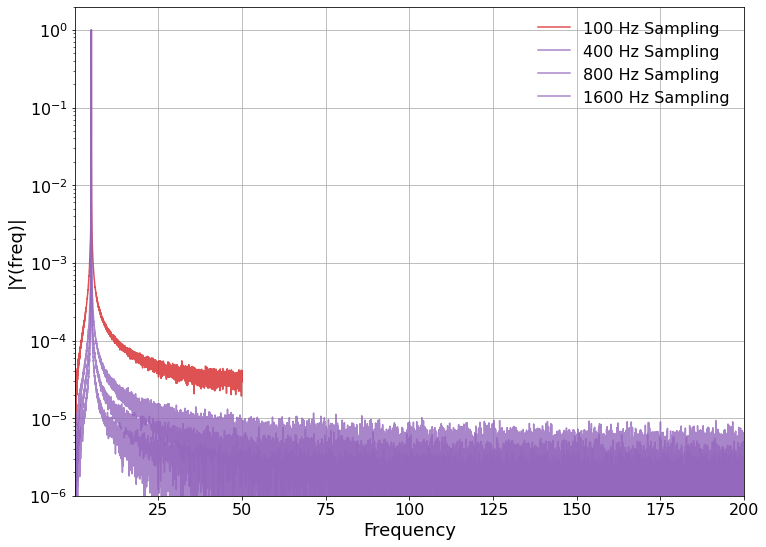

In [27]:
fig = plt.figure(figsize=(12,9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel(r'Frequency',fontsize=18)
ax1.set_ylabel(r'|Y(freq)|',fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.grid()

# Plotting
ax1.semilogy(fft_x_100, np.abs(fft_y_100), color='tab:red', label='100 Hz Sampling', alpha=0.8)
ax1.semilogy(fft_x_400, np.abs(fft_y_400), color='tab:purple', label='400 Hz Sampling', alpha=0.8)
ax1.semilogy(fft_x_800, np.abs(fft_y_800), color='tab:purple', label='800 Hz Sampling', alpha=0.8)
ax1.semilogy(fft_x_1600, np.abs(fft_y_1600), color='tab:purple', label='1600 Hz Sampling', alpha=0.8)

plt.legend(frameon=False, fontsize=16)
ax1.set_xlim(0.001, 200)
ax1.set_ylim(1e-6, 2)

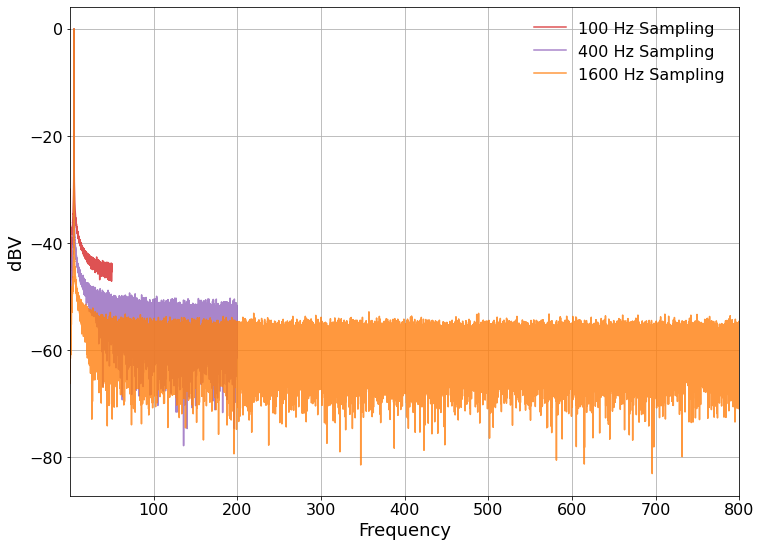

In [34]:
fig = plt.figure(figsize=(12,9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel(r'Frequency',fontsize=18)
ax1.set_ylabel(r'dBV',fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.grid()

# Plotting
ax1.plot(fft_x_100, 10 * np.log10(np.abs(fft_y_100)), color='tab:red', label='100 Hz Sampling', alpha=0.8)
ax1.plot(fft_x_400, 10 * np.log10(np.abs(fft_y_400)), color='tab:purple', label='400 Hz Sampling', alpha=0.8)
#ax1.plot(fft_x_800, 10 * np.log10(np.abs(fft_y_800)), color='tab:orange', label='800 Hz Sampling', alpha=0.8)
ax1.plot(fft_x_1600, 10 * np.log10(np.abs(fft_y_1600)), color='tab:orange', label='1600 Hz Sampling', alpha=0.8)

plt.legend(frameon=False, fontsize=16)
ax1.set_xlim(0.001, 800)
#ax1.set_ylim(1e-6, 2)
#ax1.axhline(y=-44)
#ax1.axhline(y=-44-6)
#ax1.axhline(y=-44-6-6) 

plt.savefig('oversampling_1600.png', bbox_inches="tight"); 

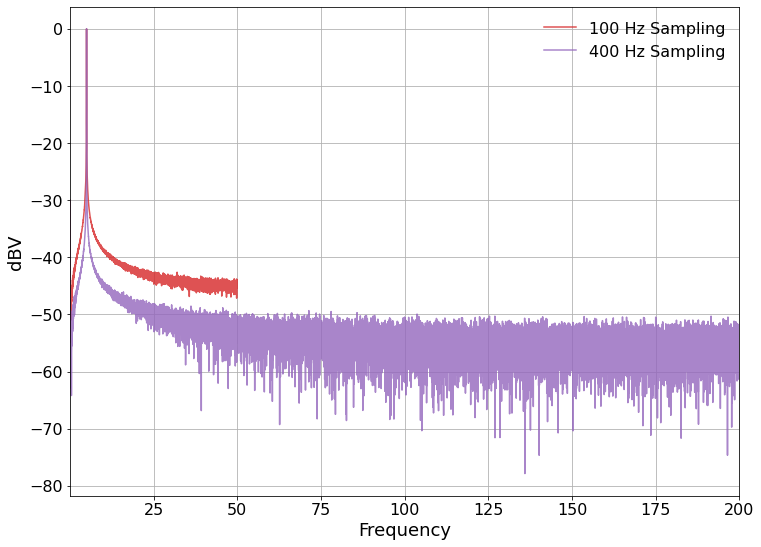

In [36]:
fig = plt.figure(figsize=(12,9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel(r'Frequency',fontsize=18)
ax1.set_ylabel(r'dBV',fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.grid()

# Plotting
ax1.plot(fft_x_100, 10 * np.log10(np.abs(fft_y_100)), color='tab:red', label='100 Hz Sampling', alpha=0.8)
ax1.plot(fft_x_400, 10 * np.log10(np.abs(fft_y_400)), color='tab:purple', label='400 Hz Sampling', alpha=0.8)
#ax1.plot(fft_x_800, 10 * np.log10(np.abs(fft_y_800)), color='tab:orange', label='800 Hz Sampling', alpha=0.8)
#ax1.plot(fft_x_1600, 10 * np.log10(np.abs(fft_y_1600)), color='tab:orange', label='1600 Hz Sampling', alpha=0.8)

plt.legend(frameon=False, fontsize=16)
ax1.set_xlim(0.001, 200)
#ax1.set_ylim(1e-6, 2)
#ax1.axhline(y=-44)
#ax1.axhline(y=-44-6)
#ax1.axhline(y=-44-6-6) 

plt.savefig('oversampling_400.png', bbox_inches="tight"); 

In [40]:
oversampling = np.array([1, 4, 16])
snr_improvement = np.sqrt(oversampling) * 100
enob = (snr_improvement - 1.76) / 6.02

In [41]:
enob

array([16.31893688, 32.93023256, 66.15282392])